<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [2]:
pip install numpy pandas seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade pip


  Using cached pip-24.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install numpy pandas seaborn



In [6]:
%pip install numpy pandas seaborn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [8]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis
1.Load and Inspect Data: Start by loading the dataset containing Falcon 9 launch and landing data.

2.Data Cleaning: Check for missing values, handle outliers if necessary, and ensure data types are appropriate for analysis.

3.Statistical Summaries: Calculate summary statistics (mean, median, standard deviation) for numerical variables to understand their distribution.

4.Visualizations: Use histograms, box plots, and scatter plots to visualize distributions, relationships between variables, and potential outliers.

5.Explore Categorical Variables: Count plots or bar charts to explore categorical variables like launch outcome, landing outcome, booster version, etc.

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [14]:
import requests
import pandas as pd
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
df = pd.read_csv(io.StringIO(response.text))


In [17]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


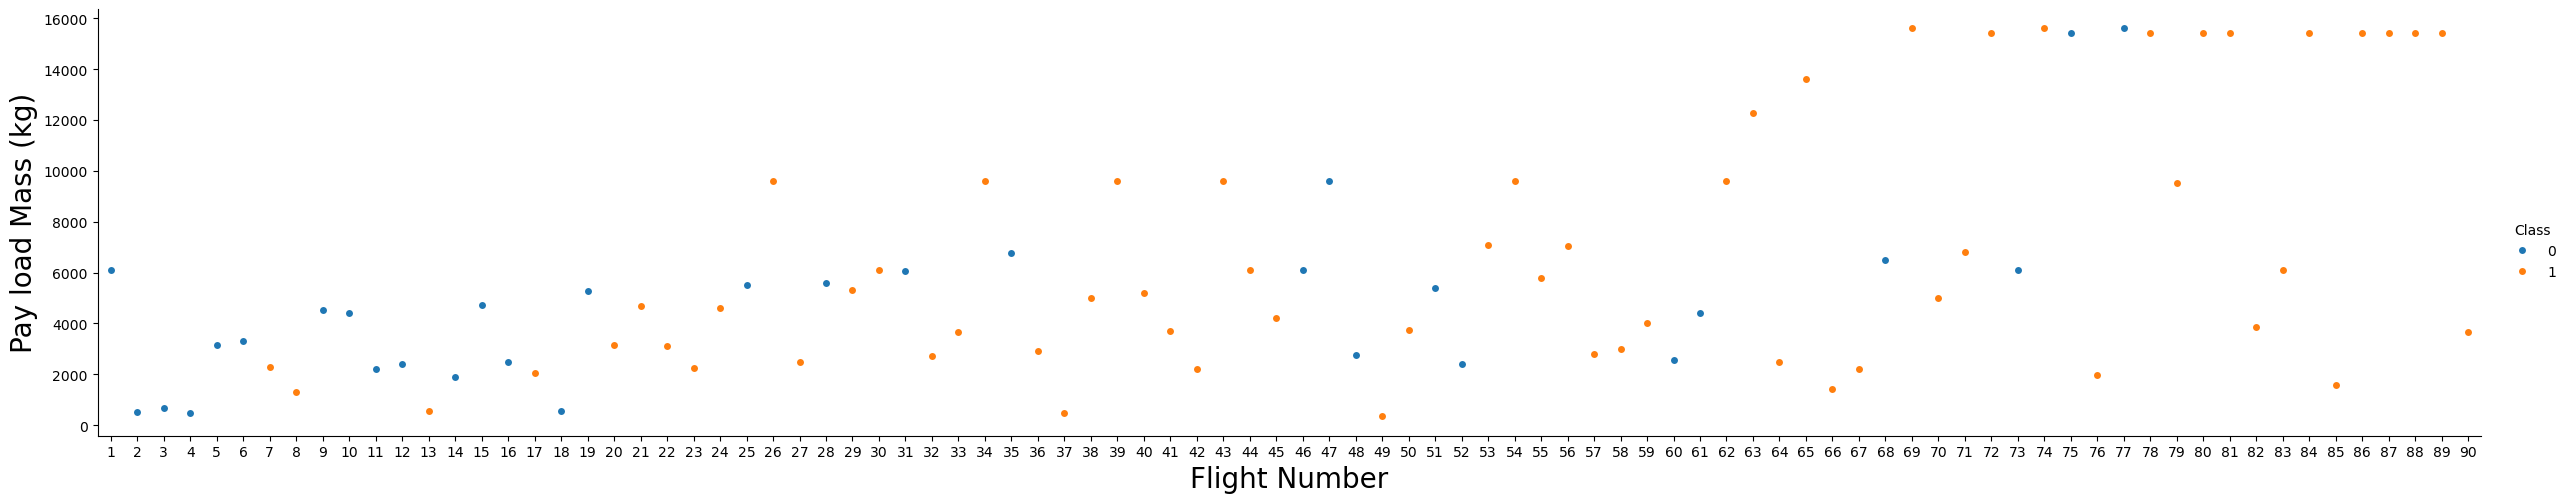

In [18]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


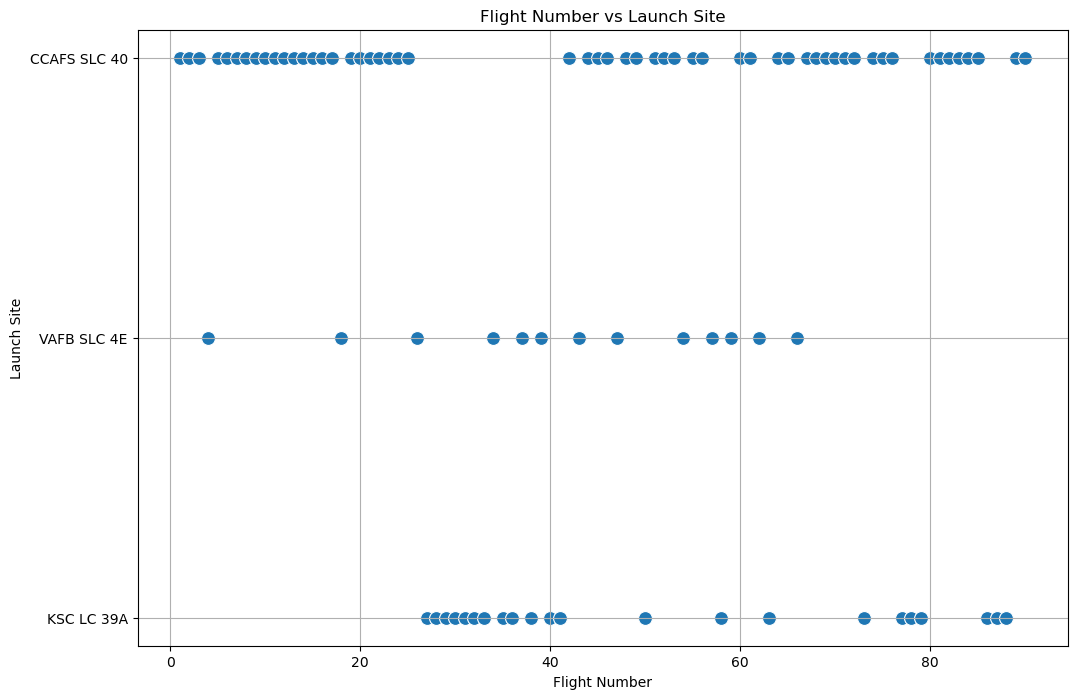

In [19]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
# Plotting FlightNumber vs LaunchSite

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', s=100)
plt.title('Flight Number vs Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.grid(True)
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


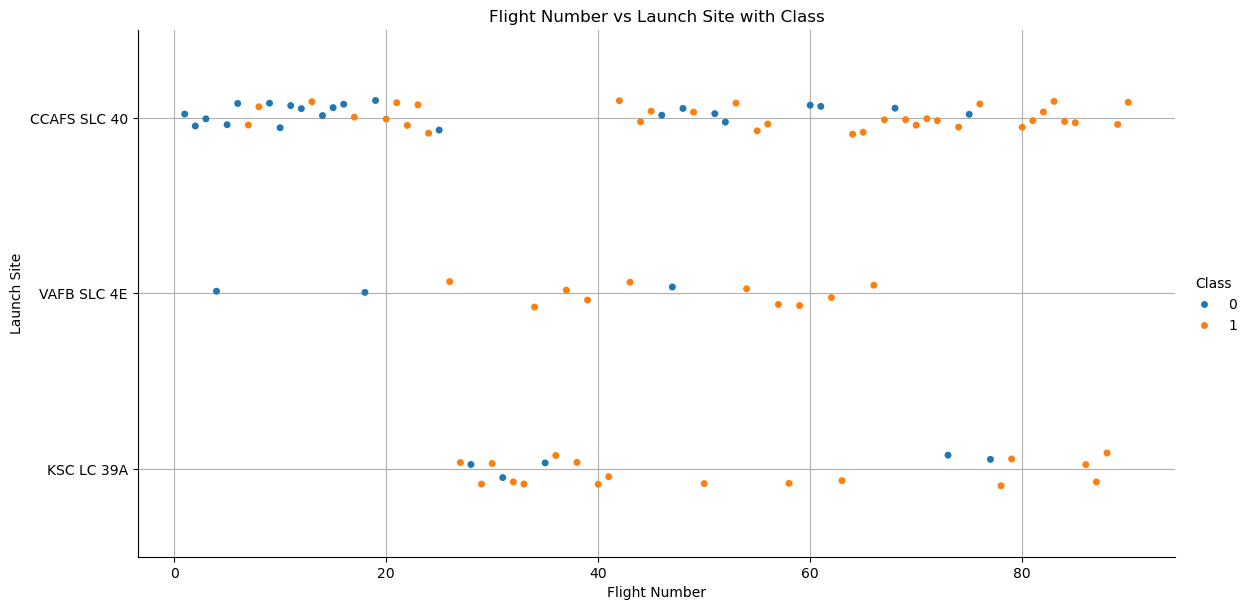

In [20]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', kind='strip', height=6, aspect=2)
plt.title('Flight Number vs Launch Site with Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.grid(True)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


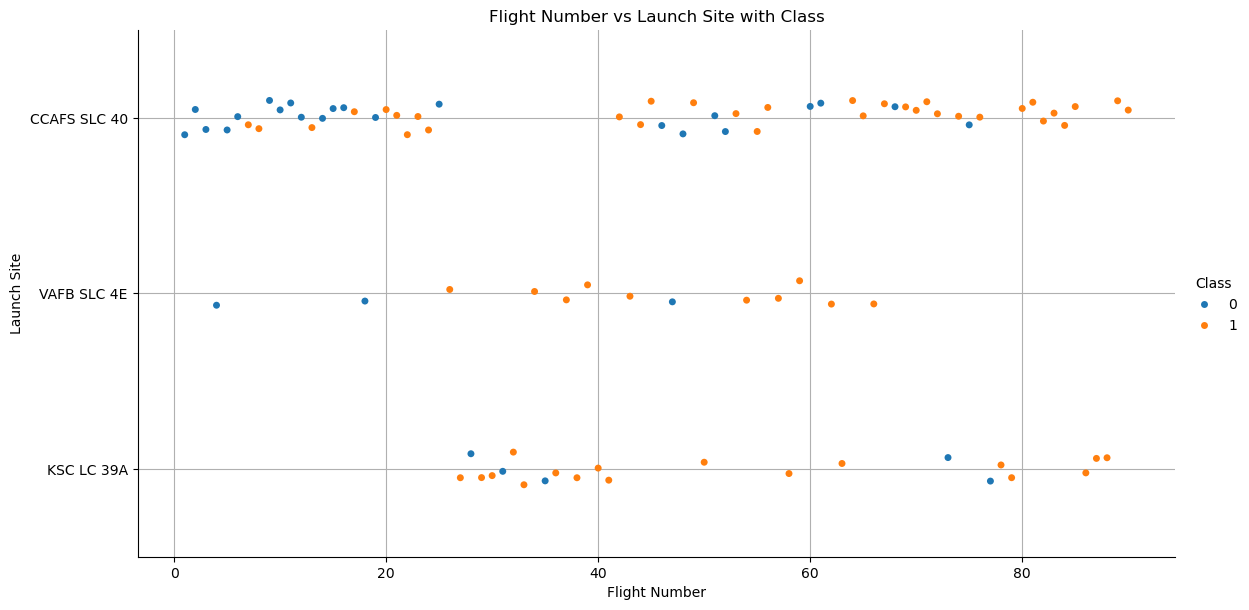

In [21]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', kind='strip', height=6, aspect=2)
plt.title('Flight Number vs Launch Site with Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.grid(True)
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


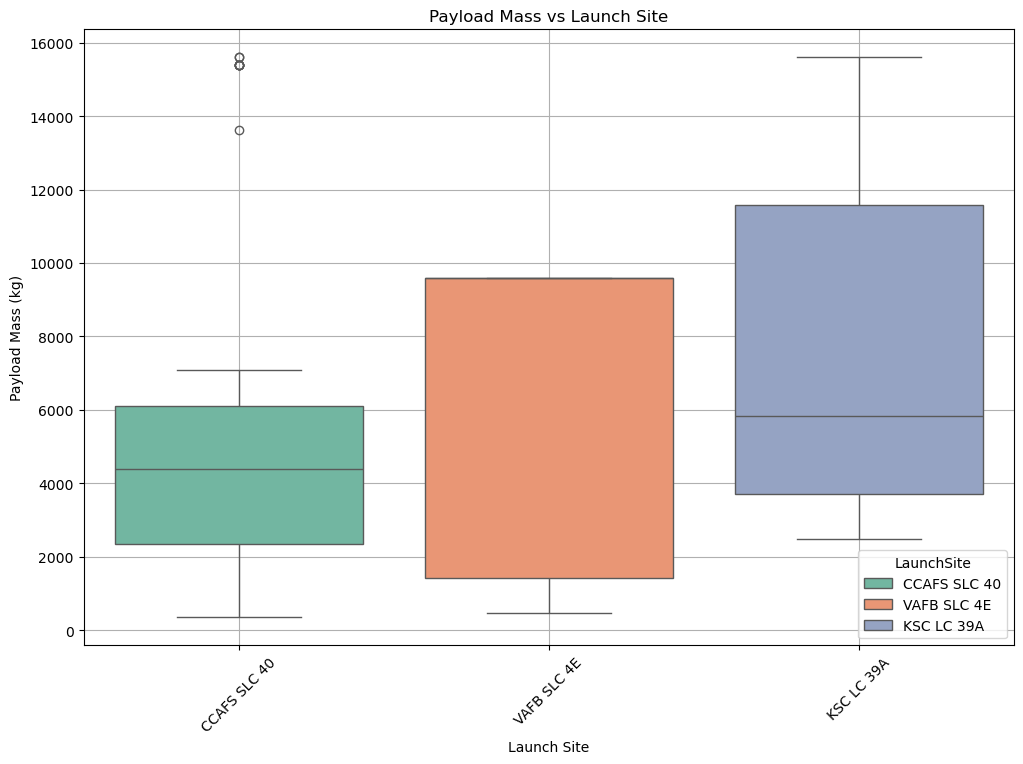

In [32]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='LaunchSite', y='PayloadMass', hue='LaunchSite', palette='Set2', dodge=False, legend=True)
plt.title('Payload Mass vs Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


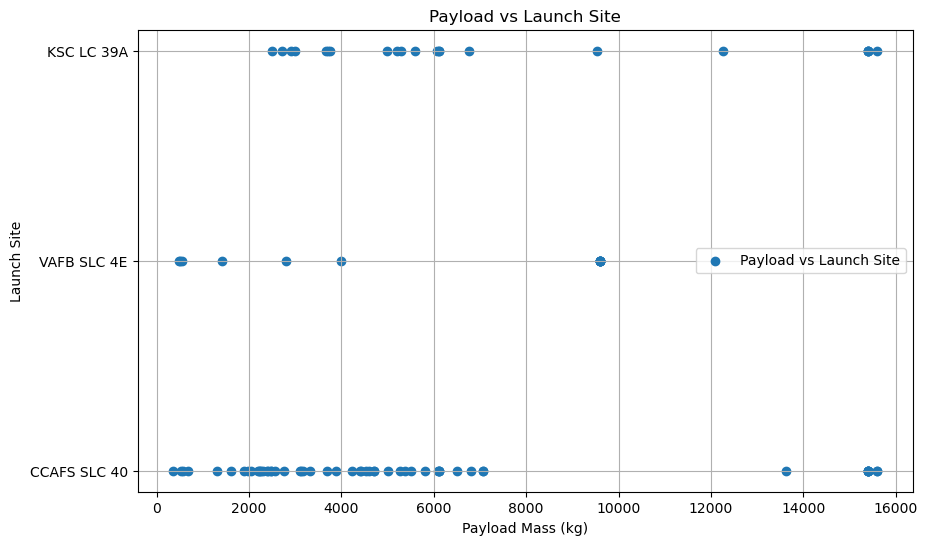

In [33]:
### TASK  3: Visualize the relationship between success rate of each orbit type
vafb_data = df[(df['LaunchSite'] == 'VAFB SLC 4E') & (df['PayloadMass'] > 10000)]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['PayloadMass'], df['LaunchSite'], label='Payload vs Launch Site')
if not vafb_data.empty:
    plt.scatter(vafb_data['PayloadMass'], vafb_data['LaunchSite'], color='red', label='Payload > 10000')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Payload vs Launch Site')
plt.legend()
plt.grid(True)
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


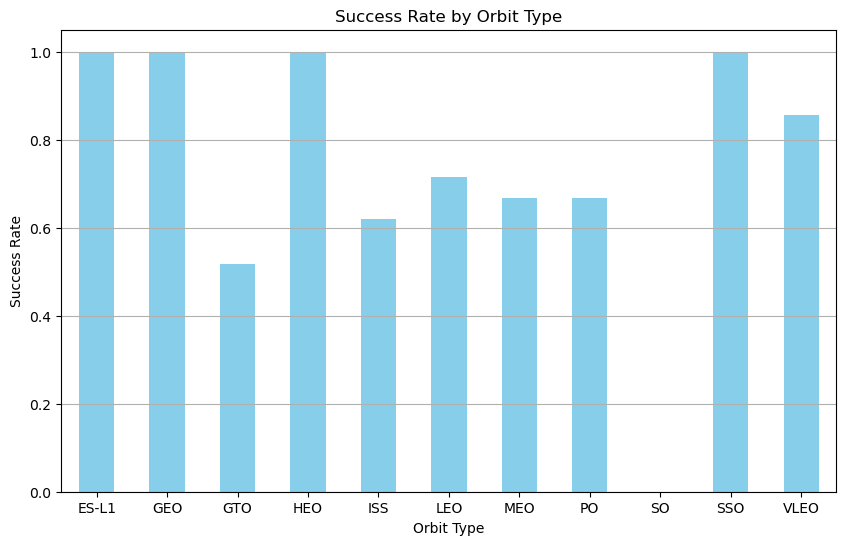

In [34]:
# HINT use groupby method on Orbit column and get the mean of Class column
success_rate = df.groupby('Orbit')['Class'].mean()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


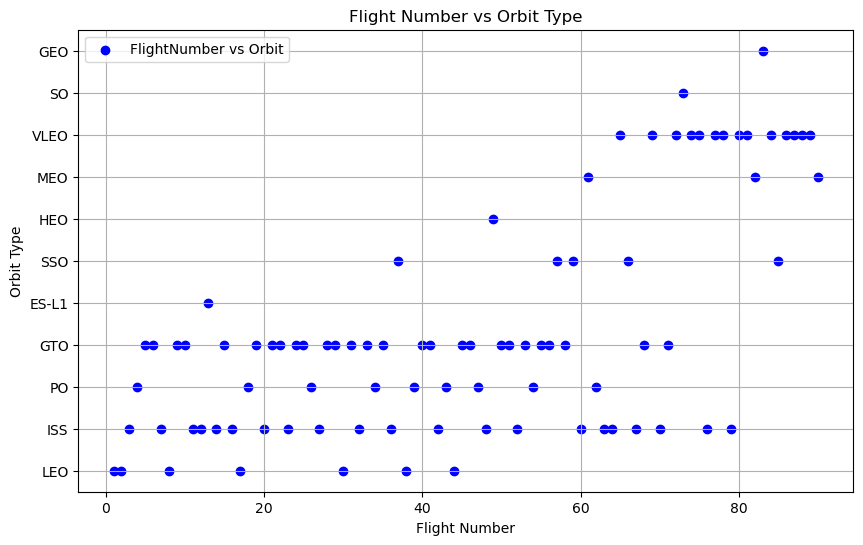

In [35]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
plt.figure(figsize=(10, 6))
plt.scatter(df['FlightNumber'], df['Orbit'], color='blue', label='FlightNumber vs Orbit')
plt.title('Flight Number vs Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend()
plt.grid(True)
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


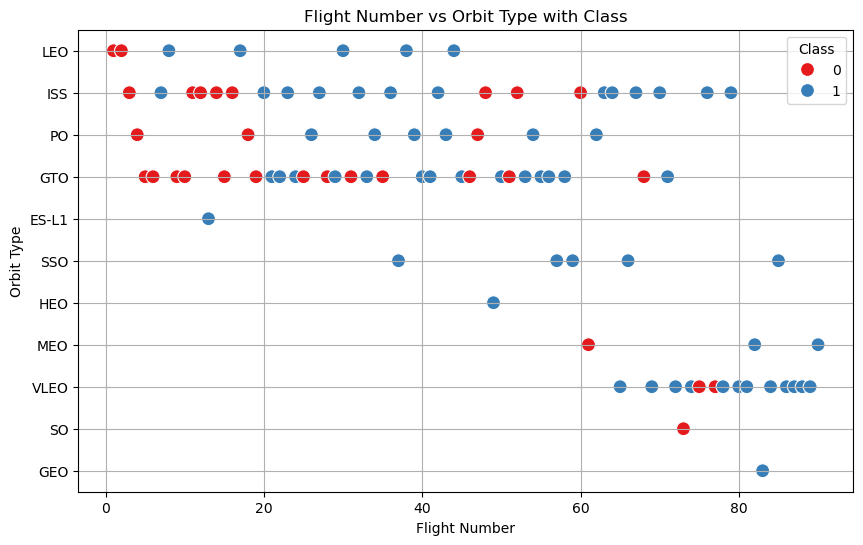

In [36]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='Set1', s=100)
plt.title('Flight Number vs Orbit Type with Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend(title='Class', loc='best')
plt.grid(True)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


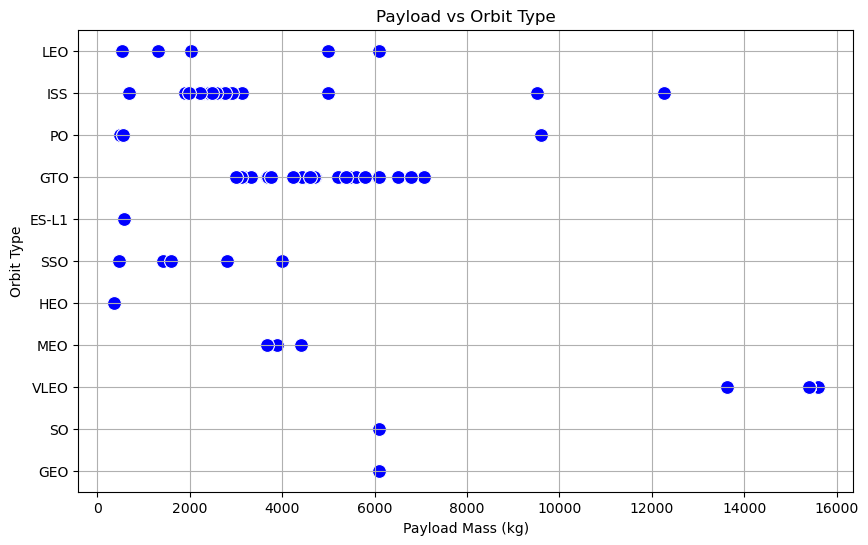

In [37]:
### TASK  5: Visualize the relationship between Payload and Orbit type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', color='blue', s=100)
plt.title('Payload vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


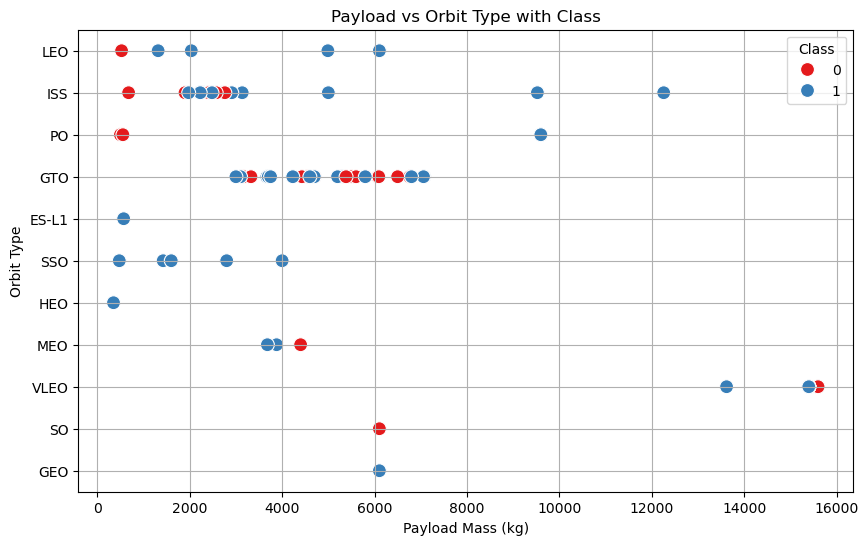

In [38]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize = (10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='Set1', s=100)
plt.title('Payload vs Orbit Type with Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.legend(title='Class')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan df_filtered sudah berisi data dengan benar
print(df_filtered.head())  # Tampilkan beberapa baris pertama untuk memeriksa struktur data

# Visualisasi tren keberhasilan peluncuran tahunan untuk setiap jenis orbit
plt.figure(figsize=(12, 8))

# Pastikan nama kolom 'Year' ada di df_filtered
if 'Year' in df_filtered.columns:
    # Menghitung jumlah keberhasilan peluncuran untuk setiap tahun dan orbit
    launch_success = df_filtered[df_filtered['Class'] == 1].groupby(['Orbit', 'Year']).size().reset_index(name='SuccessCount')

    # Menghitung total peluncuran untuk setiap tahun dan orbit
    launch_counts = df_filtered.groupby(['Orbit', 'Year']).size().reset_index(name='TotalCount')

    # Menggabungkan data keberhasilan dan total peluncuran
    launch_success = pd.merge(launch_success, launch_counts, on=['Orbit', 'Year'])

    # Menghitung persentase keberhasilan peluncuran untuk setiap tahun dan orbit
    launch_success['SuccessRate'] = (launch_success['SuccessCount'] / launch_success['TotalCount']) * 100

    # Visualisasi menggunakan seaborn
    sns.lineplot(data=launch_success, x='Year', y='SuccessRate', hue='Orbit', marker='o')

    # Menambahkan judul dan label sumbu
    plt.title('Annual Launch Success Rate by Orbit Type')
    plt.xlabel('Year')
    plt.ylabel('Success Rate (%)')

    # Menampilkan legenda
    plt.legend(title='Orbit')

    # Menampilkan plot
    plt.grid(True)
    plt.xticks(launch_success['Year'].unique())
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Year' tidak ditemukan di df_filtered.")




   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   
1  None None        1     False   False  False        NaN    1.0            0   
2  None None        1     False   False  False        NaN    1.0            0   
4  None None        1     False   False  False        NaN    1.0            0   
5  None None        1     False   False  False        NaN    1.0            0   

  Serial  Longitude   Latitude  Class 

<Figure size 1200x800 with 0 Axes>

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [42]:
# Function to extract years from the date and update the 'Date' column
def Extract_year(df):
    years = []
    for date in df["Date"]:
        year = str(date).split("-")[0]  # Convert Timestamp to string and split
        years.append(year)
    df['Date'] = years  # Update the 'Date' column with extracted years

# Call the function to update 'Date' column in df
Extract_year(df)

# Display the updated DataFrame head to verify
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [46]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
plt.figure(figsize=(12, 8))
sns.lineplot(data=launch_success, x='Year', y='SuccessRate', marker='o')

# Adding title and labels
plt.title('Annual Launch Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'launch_success' is not defined

<Figure size 1200x800 with 0 Axes>

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering
Feature Engineering Ideas:
1.	Time-related Features:
  - Month and Season: Extracting the month or season from the launch date could reveal seasonal patterns affecting success rates.
  - Day of Week: Determining if the day of the week influences success rates.
  - Quarter: Aggregating launches by quarter to see if there are quarterly trends.
3.	Payload-related Features:
  - Payload Category: Creating categories for payloads based on their mass (e.g., light, medium, heavy) might show if heavier payloads affect success rates differently.
  - Normalized Payload Mass: Normalizing payload mass relative to the rocket's capacity could provide insights into optimal payload sizes for successful launches.
4.	Location-related Features:
  - Launch Site Features: Analyzing additional characteristics of launch sites (e.g., geographical location, historical success rates) might correlate with success rates.
  - Distance to Recovery Zone: Calculating the distance between the launch site and potential recovery zones could impact decision-making regarding landing strategies.
5.	Booster-related Features:
  - Booster Age: Determining if the age of the booster (number of flights it has undergone) affects its reliability.
  - Booster Reusability History: Creating features based on the historical success rates of boosters to understand how past performance influences future outcomes.
6.	Mission-related Features:
  - Orbit Type: Creating dummy variables for different orbit types (e.g., LEO, GTO) to understand how launch destination impacts success rates.
  - Mission Outcome History: Aggregating past mission outcomes (success, failure) to predict future outcomes.
7.	Environmental Features:
  - Weather Conditions: Incorporating weather data (e.g., wind speed, temperature) around launch times to assess their impact on success rates.



By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [35]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [37]:
### TASK  7: Create dummy variables to categorical columns

categorical_columns = ['Orbit', 'LaunchSite']
df_dummies = pd.get_dummies(df, columns=categorical_columns)
print(df_dummies.head())

   FlightNumber  Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1  2010       Falcon 9  6104.959412    None None        1   
1             2  2012       Falcon 9   525.000000    None None        1   
2             3  2013       Falcon 9   677.000000    None None        1   
3             4  2013       Falcon 9   500.000000  False Ocean        1   
4             5  2013       Falcon 9  3170.000000    None None        1   

   GridFins  Reused   Legs LandingPad  ...  Orbit_ISS  Orbit_LEO Orbit_MEO  \
0     False   False  False        NaN  ...          0          1         0   
1     False   False  False        NaN  ...          0          1         0   
2     False   False  False        NaN  ...          1          0         0   
3     False   False  False        NaN  ...          0          0         0   
4     False   False  False        NaN  ...          0          0         0   

   Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  LaunchSite_CCAFS SLC 40  \
0      

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [38]:
# HINT: Use get_dummies() function on the categorical columns
# Pilih kolom-kolom kategorikal yang akan di-encode
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Lakukan OneHotEncoding menggunakan pd.get_dummies()
features_one_hot = pd.get_dummies(df, columns=categorical_columns)

# Tampilkan hasil dengan method head()
print(features_one_hot.head())

   FlightNumber  Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1  2010       Falcon 9  6104.959412    None None        1   
1             2  2012       Falcon 9   525.000000    None None        1   
2             3  2013       Falcon 9   677.000000    None None        1   
3             4  2013       Falcon 9   500.000000  False Ocean        1   
4             5  2013       Falcon 9  3170.000000    None None        1   

   GridFins  Reused   Legs  Block  ...  Serial_B1048  Serial_B1049  \
0     False   False  False    1.0  ...             0             0   
1     False   False  False    1.0  ...             0             0   
2     False   False  False    1.0  ...             0             0   
3     False   False  False    1.0  ...             0             0   
4     False   False  False    1.0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0             0          

In [40]:
### TASK  8: Cast all numeric columns to `float64`
# Identify numeric columns
numeric_columns = features_one_hot.select_dtypes(include=[np.number]).columns.tolist()

# Cast numeric columns to float64
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Display the data types after conversion
print(features_one_hot.dtypes)



FlightNumber      float64
Date               object
BoosterVersion     object
PayloadMass       float64
Outcome            object
                   ...   
Serial_B1056      float64
Serial_B1058      float64
Serial_B1059      float64
Serial_B1060      float64
Serial_B1062      float64
Length: 87, dtype: object


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [46]:
# HINT: use astype function
# Check data types before casting
print(features_one_hot.dtypes)

# Assuming you have already encoded all categorical columns and removed non-numeric values
# If not, ensure all non-numeric values are addressed (e.g., encoding categorical columns)
# Once everything is numeric, attempt to cast to float64 again
features_one_hot = features_one_hot.astype('float64')

# Display the data types after conversion
print(features_one_hot.dtypes)




FlightNumber      float64
Date               object
BoosterVersion     object
PayloadMass       float64
Outcome            object
                   ...   
Serial_B1056      float64
Serial_B1058      float64
Serial_B1059      float64
Serial_B1060      float64
Serial_B1062      float64
Length: 87, dtype: object


<class 'ValueError'>: could not convert string to float: 'Falcon 9'

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
